***Note to grader:***

***As mentioned as being acceptable by Ravinder, I will use the Zillow data for these exercises instead of the Telco data***

# Scaling Exercises

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Custom module imports
import wrangle as w

In [2]:
# use function from last exercises to wrangle data
train, validate, test = w.wrangle_zillow()

In [3]:
# check splits
train.shape, validate.shape, test.shape

((1433959, 7), (177232, 7), (179022, 7))

## 1.

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [4]:
# define Ravinder's function
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [5]:
# take a look at train before adding scaled columns
train.head().T

,1029630,1168014,488819,243088,1508871
bedroomcnt,2,4,3,4,3
bathroomcnt,2.0,2.0,2.0,2.0,4.0
calculatedfinishedsquarefeet,2061,1902,2086,2096,2876
taxvaluedollarcnt,312381.0,420728.0,143683.0,731905.0,780947.0
yearbuilt,1956,1971,1955,1959,1959
taxamount,4080.3,4843.26,2194.57,8656.04,9569.81
fips,06037,06037,06037,06037,06037


In [6]:
# create a list of columns to scale excluding target
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxamount']

### MinMaxScaler

#### Apply Scaler

In [7]:
# use Ravinder's function to add scaled columns to each split
train, validate, test = add_scaled_columns(train, validate, test, scaler=sklearn.preprocessing.MinMaxScaler(), columns_to_scale=cols)

In [8]:
# take a look at results
train.head().T

,1029630,1168014,488819,243088,1508871
bedroomcnt,2,4,3,4,3
bathroomcnt,2.0,2.0,2.0,2.0,4.0
calculatedfinishedsquarefeet,2061,1902,2086,2096,2876
taxvaluedollarcnt,312381.0,420728.0,143683.0,731905.0,780947.0
yearbuilt,1956,1971,1955,1959,1959
taxamount,4080.3,4843.26,2194.57,8656.04,9569.81
fips,06037,06037,06037,06037,06037
bedroomcnt_scaled,0.0,0.666667,0.333333,0.666667,0.333333
bathroomcnt_scaled,0.333333,0.333333,0.333333,0.333333,1.0
calculatedfinishedsquarefeet_scaled,0.604106,0.557478,0.611437,0.61437,0.843109


#### Visualize Results

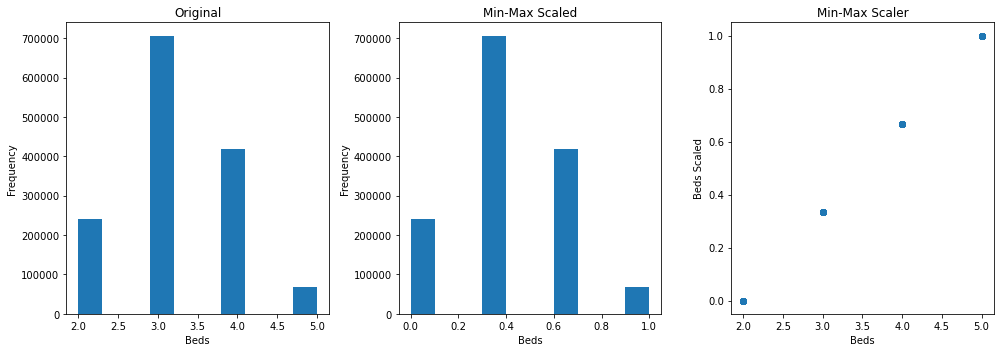

In [9]:
# Visualize the un-scaled and scaled distribution
plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bedroomcnt.plot.hist(title='Original')
plt.xlabel('Beds')

#subplot 2
plt.subplot(132)
train.bedroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('Beds')

#subplot 3
plt.subplot(133)
plt.scatter(train.bedroomcnt, train.bedroomcnt_scaled)
plt.xlabel('Beds')
plt.ylabel('Beds Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

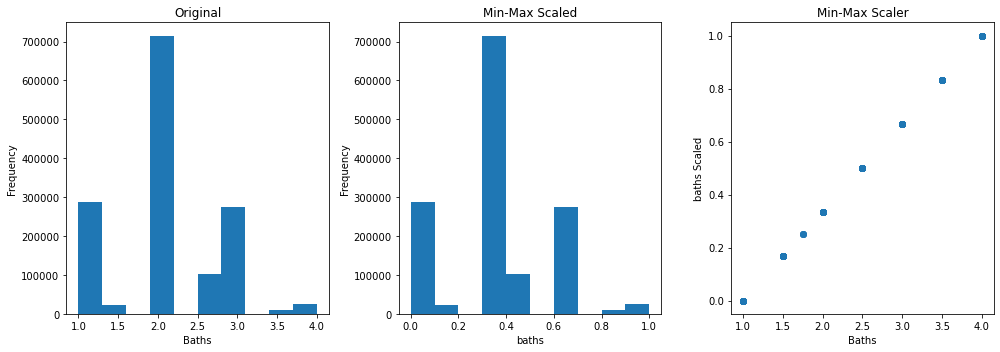

In [10]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bathroomcnt.plot.hist(title='Original')
plt.xlabel('Baths')

#subplot 2
plt.subplot(132)
train.bathroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('baths')

#subplot 3
plt.subplot(133)
plt.scatter(train.bathroomcnt, train.bathroomcnt_scaled)
plt.xlabel('Baths')
plt.ylabel('baths Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

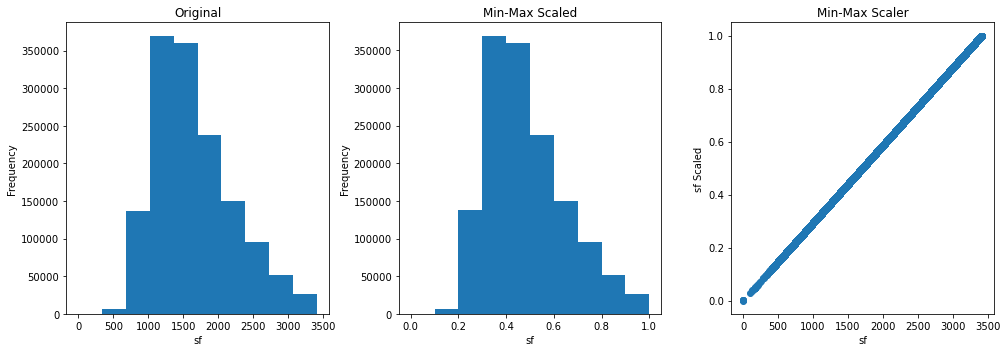

In [11]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.calculatedfinishedsquarefeet.plot.hist(title='Original')
plt.xlabel('sf')

#subplot 2
plt.subplot(132)
train.calculatedfinishedsquarefeet_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('sf')

#subplot 3
plt.subplot(133)
plt.scatter(train.calculatedfinishedsquarefeet, train.calculatedfinishedsquarefeet_scaled)
plt.xlabel('sf')
plt.ylabel('sf Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

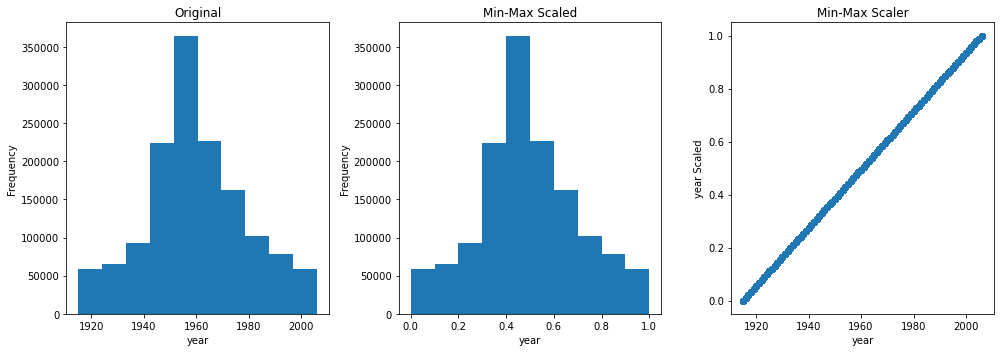

In [12]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.yearbuilt.plot.hist(title='Original')
plt.xlabel('year')

#subplot 2
plt.subplot(132)
train.yearbuilt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('year')

#subplot 3
plt.subplot(133)
plt.scatter(train.yearbuilt, train.yearbuilt_scaled)
plt.xlabel('year')
plt.ylabel('year Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

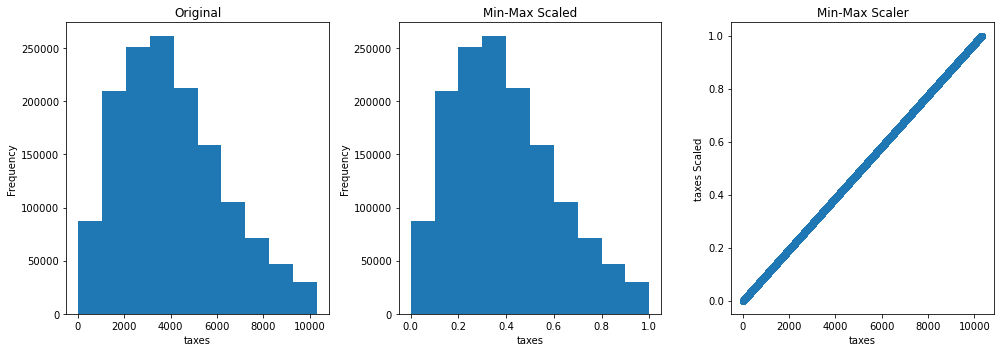

In [13]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.taxamount.plot.hist(title='Original')
plt.xlabel('taxes')

#subplot 2
plt.subplot(132)
train.taxamount_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('taxes')

#subplot 3
plt.subplot(133)
plt.scatter(train.taxamount, train.taxamount_scaled)
plt.xlabel('taxes')
plt.ylabel('taxes Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

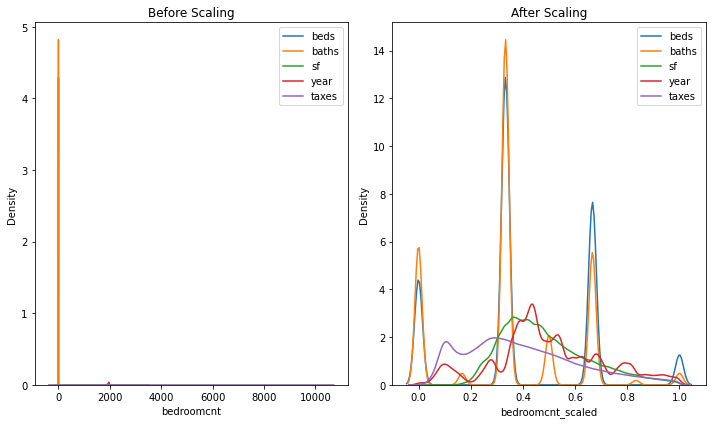

In [14]:
# Distributions

plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.bedroomcnt, label = 'beds')
sns.kdeplot(x = train.bathroomcnt,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet,label = 'sf')
sns.kdeplot(x = train.yearbuilt,label = 'year')
sns.kdeplot(x = train.taxamount,label = 'taxes')
# plt.xlabel('Original')
plt.legend()
plt.title('Before Scaling')

plt.subplot(122)
sns.kdeplot(x = train.bedroomcnt_scaled, label = 'beds')
sns.kdeplot(x = train.bathroomcnt_scaled,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet_scaled,label = 'sf')
sns.kdeplot(x = train.yearbuilt_scaled,label = 'year')
sns.kdeplot(x = train.taxamount_scaled,label = 'taxes')
# plt.xlabel('Scaled')
plt.title('After Scaling')
plt.legend()

plt.tight_layout()

### StandardScaler

In [15]:
# use function from last exercises to wrangle data
train, validate, test = w.wrangle_zillow()

#### Apply Scaler

In [16]:
# use Ravinder's function to add scaled columns to each split
train, validate, test = add_scaled_columns(train, validate, test, scaler=sklearn.preprocessing.StandardScaler(), columns_to_scale=cols)

In [17]:
# take a look at results
train.head().T

,1029630,1168014,488819,243088,1508871
bedroomcnt,2,4,3,4,3
bathroomcnt,2.0,2.0,2.0,2.0,4.0
calculatedfinishedsquarefeet,2061,1902,2086,2096,2876
taxvaluedollarcnt,312381.0,420728.0,143683.0,731905.0,780947.0
yearbuilt,1956,1971,1955,1959,1959
taxamount,4080.3,4843.26,2194.57,8656.04,9569.81
fips,06037,06037,06037,06037,06037
bedroomcnt_scaled,-1.568267,1.00383,-0.282219,1.00383,-0.282219
bathroomcnt_scaled,-0.086734,-0.086734,-0.086734,-0.086734,2.768641
calculatedfinishedsquarefeet_scaled,0.72364,0.440943,0.76809,0.78587,2.172688


#### Visualize Results

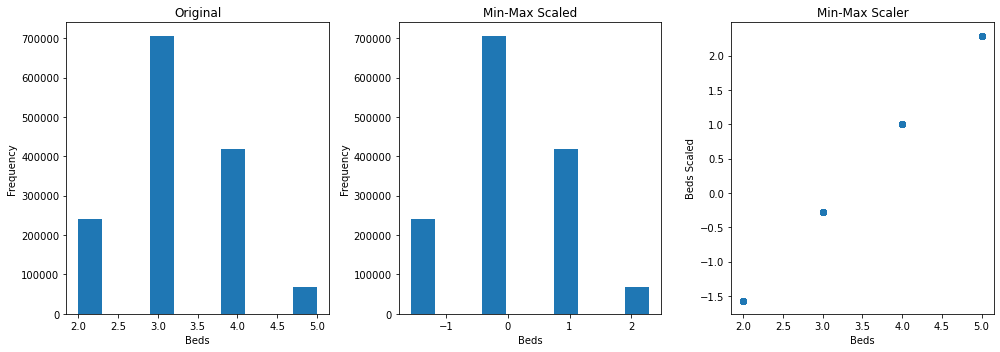

In [18]:
# Visualize the un-scaled and scaled distribution
plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bedroomcnt.plot.hist(title='Original')
plt.xlabel('Beds')

#subplot 2
plt.subplot(132)
train.bedroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('Beds')

#subplot 3
plt.subplot(133)
plt.scatter(train.bedroomcnt, train.bedroomcnt_scaled)
plt.xlabel('Beds')
plt.ylabel('Beds Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

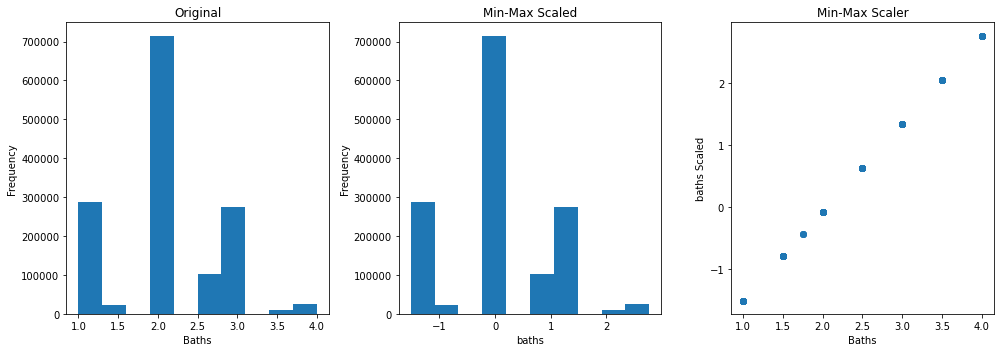

In [19]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bathroomcnt.plot.hist(title='Original')
plt.xlabel('Baths')

#subplot 2
plt.subplot(132)
train.bathroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('baths')

#subplot 3
plt.subplot(133)
plt.scatter(train.bathroomcnt, train.bathroomcnt_scaled)
plt.xlabel('Baths')
plt.ylabel('baths Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

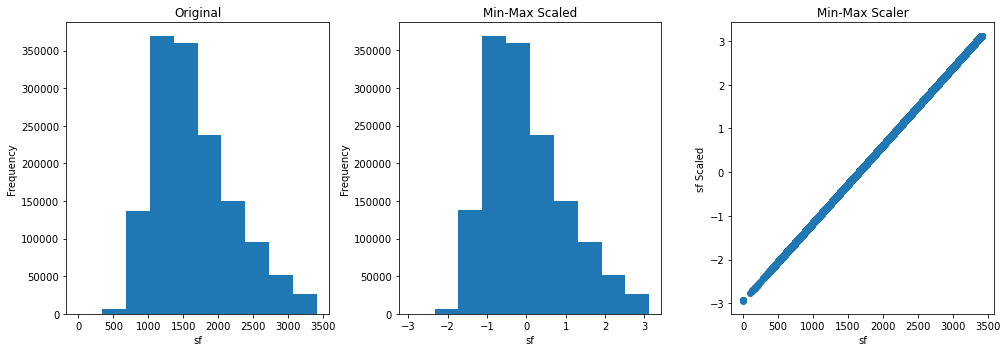

In [20]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.calculatedfinishedsquarefeet.plot.hist(title='Original')
plt.xlabel('sf')

#subplot 2
plt.subplot(132)
train.calculatedfinishedsquarefeet_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('sf')

#subplot 3
plt.subplot(133)
plt.scatter(train.calculatedfinishedsquarefeet, train.calculatedfinishedsquarefeet_scaled)
plt.xlabel('sf')
plt.ylabel('sf Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

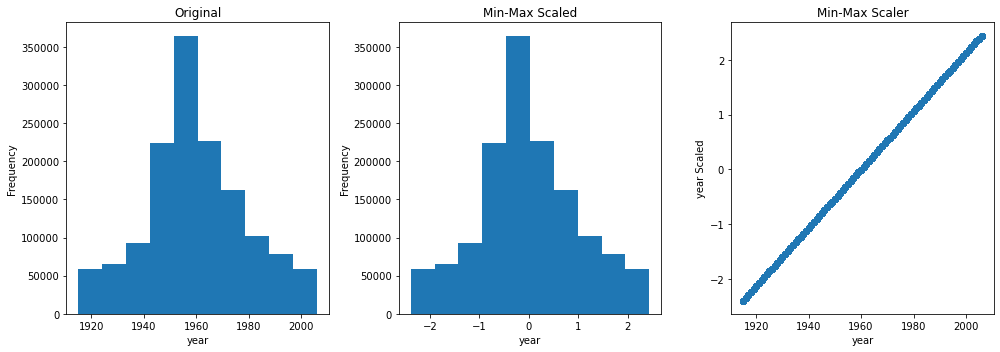

In [21]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.yearbuilt.plot.hist(title='Original')
plt.xlabel('year')

#subplot 2
plt.subplot(132)
train.yearbuilt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('year')

#subplot 3
plt.subplot(133)
plt.scatter(train.yearbuilt, train.yearbuilt_scaled)
plt.xlabel('year')
plt.ylabel('year Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

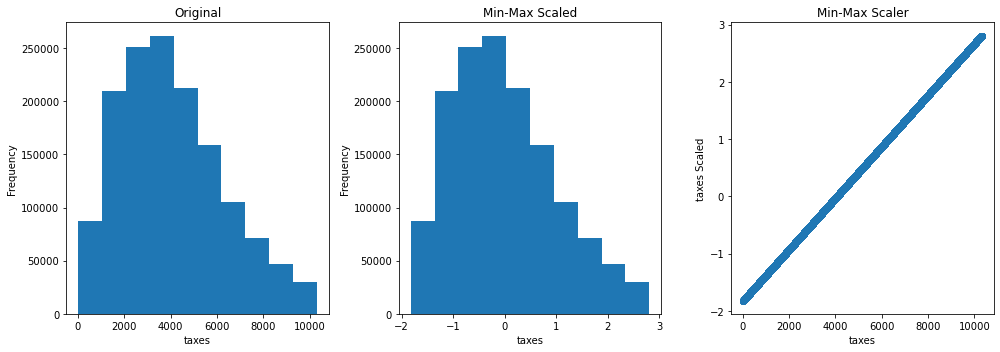

In [22]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.taxamount.plot.hist(title='Original')
plt.xlabel('taxes')

#subplot 2
plt.subplot(132)
train.taxamount_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('taxes')

#subplot 3
plt.subplot(133)
plt.scatter(train.taxamount, train.taxamount_scaled)
plt.xlabel('taxes')
plt.ylabel('taxes Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

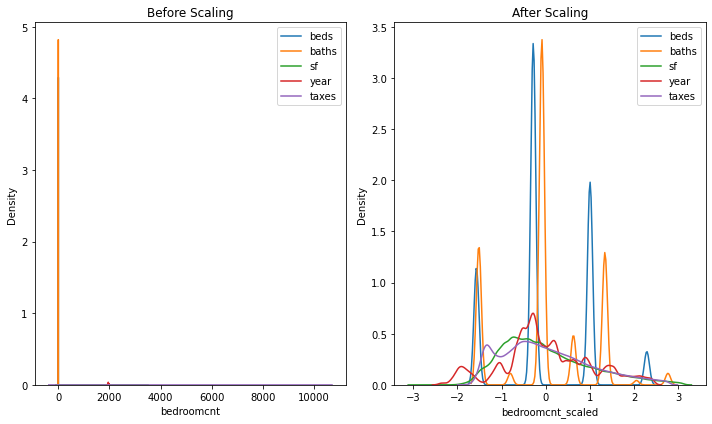

In [23]:
# Distributions

plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.bedroomcnt, label = 'beds')
sns.kdeplot(x = train.bathroomcnt,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet,label = 'sf')
sns.kdeplot(x = train.yearbuilt,label = 'year')
sns.kdeplot(x = train.taxamount,label = 'taxes')
# plt.xlabel('Original')
plt.legend()
plt.title('Before Scaling')

plt.subplot(122)
sns.kdeplot(x = train.bedroomcnt_scaled, label = 'beds')
sns.kdeplot(x = train.bathroomcnt_scaled,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet_scaled,label = 'sf')
sns.kdeplot(x = train.yearbuilt_scaled,label = 'year')
sns.kdeplot(x = train.taxamount_scaled,label = 'taxes')
# plt.xlabel('Scaled')
plt.title('After Scaling')
plt.legend()

plt.tight_layout()

### RobustScaler

In [24]:
# use function from last exercises to wrangle data
train, validate, test = w.wrangle_zillow()

#### Apply Scaler

In [25]:
# use Ravinder's function to add scaled columns to each split
train, validate, test = add_scaled_columns(train, validate, test, scaler=sklearn.preprocessing.RobustScaler(), columns_to_scale=cols)

In [26]:
# take a look at results
train.head().T

,1029630,1168014,488819,243088,1508871
bedroomcnt,2,4,3,4,3
bathroomcnt,2.0,2.0,2.0,2.0,4.0
calculatedfinishedsquarefeet,2061,1902,2086,2096,2876
taxvaluedollarcnt,312381.0,420728.0,143683.0,731905.0,780947.0
yearbuilt,1956,1971,1955,1959,1959
taxamount,4080.3,4843.26,2194.57,8656.04,9569.81
fips,06037,06037,06037,06037,06037
bedroomcnt_scaled,-1.0,1.0,0.0,1.0,0.0
bathroomcnt_scaled,0.0,0.0,0.0,0.0,4.0
calculatedfinishedsquarefeet_scaled,0.679947,0.468792,0.713147,0.726428,1.762284


#### Visualize Results

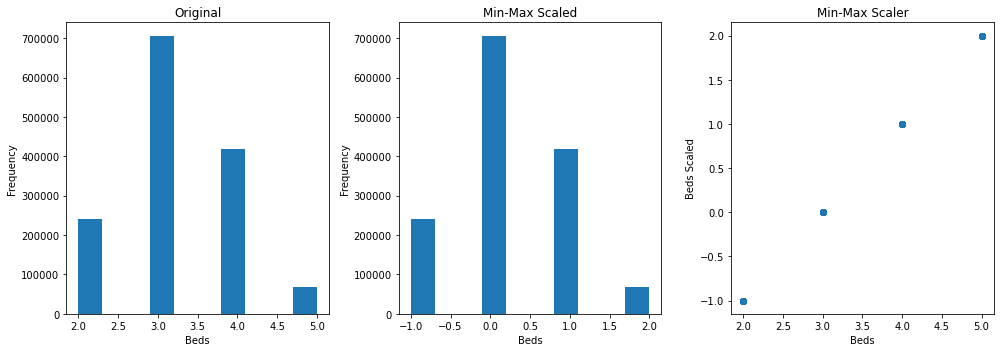

In [27]:
# Visualize the un-scaled and scaled distribution
plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bedroomcnt.plot.hist(title='Original')
plt.xlabel('Beds')

#subplot 2
plt.subplot(132)
train.bedroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('Beds')

#subplot 3
plt.subplot(133)
plt.scatter(train.bedroomcnt, train.bedroomcnt_scaled)
plt.xlabel('Beds')
plt.ylabel('Beds Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

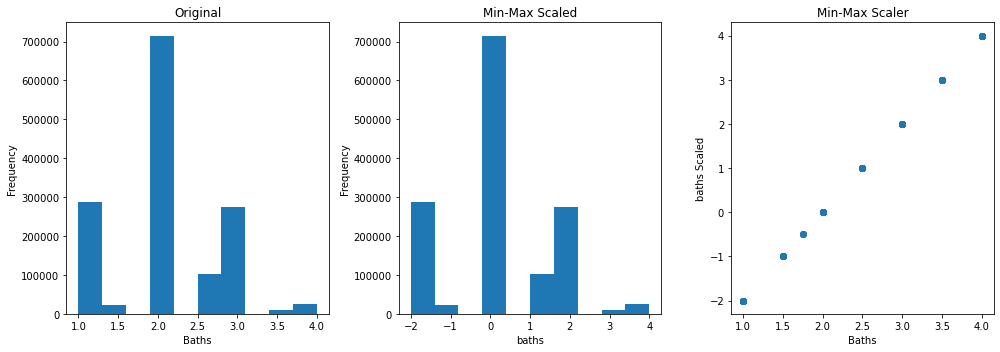

In [28]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bathroomcnt.plot.hist(title='Original')
plt.xlabel('Baths')

#subplot 2
plt.subplot(132)
train.bathroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('baths')

#subplot 3
plt.subplot(133)
plt.scatter(train.bathroomcnt, train.bathroomcnt_scaled)
plt.xlabel('Baths')
plt.ylabel('baths Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

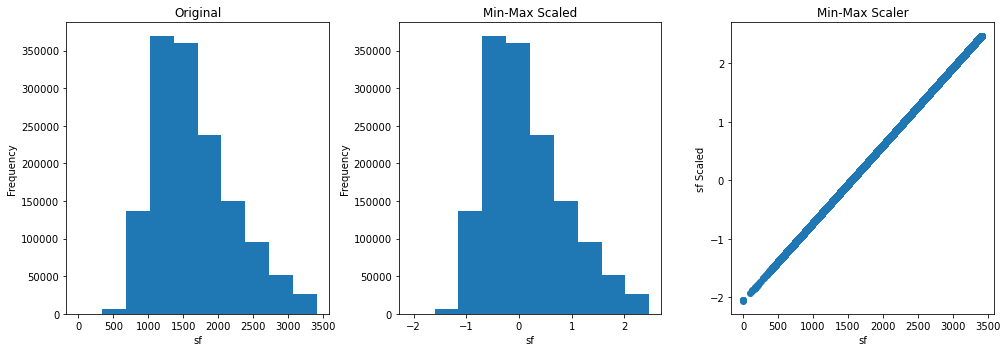

In [29]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.calculatedfinishedsquarefeet.plot.hist(title='Original')
plt.xlabel('sf')

#subplot 2
plt.subplot(132)
train.calculatedfinishedsquarefeet_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('sf')

#subplot 3
plt.subplot(133)
plt.scatter(train.calculatedfinishedsquarefeet, train.calculatedfinishedsquarefeet_scaled)
plt.xlabel('sf')
plt.ylabel('sf Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

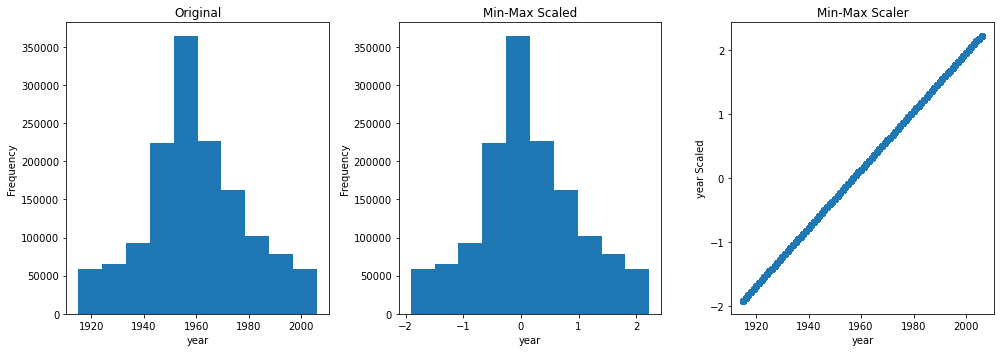

In [30]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.yearbuilt.plot.hist(title='Original')
plt.xlabel('year')

#subplot 2
plt.subplot(132)
train.yearbuilt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('year')

#subplot 3
plt.subplot(133)
plt.scatter(train.yearbuilt, train.yearbuilt_scaled)
plt.xlabel('year')
plt.ylabel('year Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

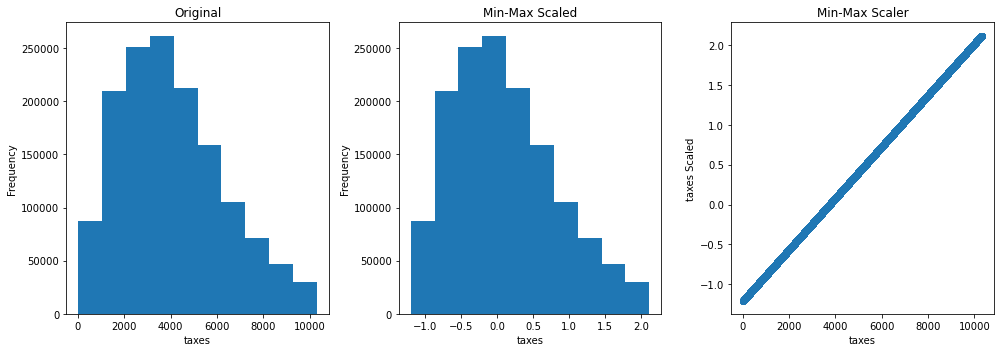

In [31]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.taxamount.plot.hist(title='Original')
plt.xlabel('taxes')

#subplot 2
plt.subplot(132)
train.taxamount_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('taxes')

#subplot 3
plt.subplot(133)
plt.scatter(train.taxamount, train.taxamount_scaled)
plt.xlabel('taxes')
plt.ylabel('taxes Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

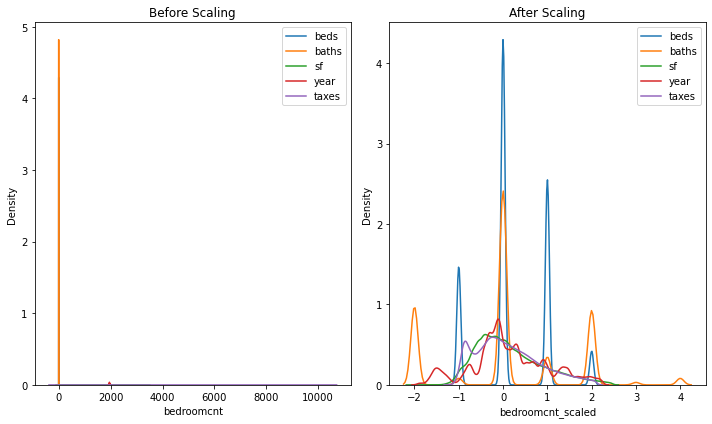

In [32]:
# Distributions

plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.bedroomcnt, label = 'beds')
sns.kdeplot(x = train.bathroomcnt,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet,label = 'sf')
sns.kdeplot(x = train.yearbuilt,label = 'year')
sns.kdeplot(x = train.taxamount,label = 'taxes')
# plt.xlabel('Original')
plt.legend()
plt.title('Before Scaling')

plt.subplot(122)
sns.kdeplot(x = train.bedroomcnt_scaled, label = 'beds')
sns.kdeplot(x = train.bathroomcnt_scaled,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet_scaled,label = 'sf')
sns.kdeplot(x = train.yearbuilt_scaled,label = 'year')
sns.kdeplot(x = train.taxamount_scaled,label = 'taxes')
# plt.xlabel('Scaled')
plt.title('After Scaling')
plt.legend()

plt.tight_layout()

## 2.

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [33]:
# create
scaler = sklearn.preprocessing.StandardScaler()

In [34]:
cols

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'taxamount']

In [35]:
# fit
scaler.fit(train[cols])

StandardScaler()

In [36]:
# transform
scaled = scaler.transform(train[cols])

In [37]:
# revert
unscaled = scaler.inverse_transform(scaled)

In [38]:
# convert to df
unscaled = pd.DataFrame(unscaled, columns=train[cols].columns, index=train.index)
unscaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount
1029630,2.0,2.0,2061.0,1956.0,4080.30
1168014,4.0,2.0,1902.0,1971.0,4843.26
488819,3.0,2.0,2086.0,1955.0,2194.57
243088,4.0,2.0,2096.0,1959.0,8656.04
1508871,3.0,4.0,2876.0,1959.0,9569.81
...,...,...,...,...,...
293494,4.0,1.0,1038.0,1953.0,1063.67
2530,4.0,2.0,1182.0,1944.0,3474.49
268557,4.0,3.5,3137.0,1990.0,6106.50
1141720,4.0,2.0,1844.0,1966.0,2749.46


In [39]:
# are all values equal
(train[cols] != unscaled).sum()

bedroomcnt                           0
bathroomcnt                          0
calculatedfinishedsquarefeet     15601
yearbuilt                            0
taxamount                       183609
dtype: int64

In [40]:
# let's look at columns where there are some differences
(train.calculatedfinishedsquarefeet != unscaled.calculatedfinishedsquarefeet).mean()

0.010879669502405577

In [41]:
train.calculatedfinishedsquarefeet[train.calculatedfinishedsquarefeet != unscaled.calculatedfinishedsquarefeet]

1241173    1014
91005       924
1892007     999
1487595     939
880703     1014
           ... 
1095110    1014
1500450     984
320019      909
347416      744
1940215     969
Name: calculatedfinishedsquarefeet, Length: 15601, dtype: int64

In [42]:
unscaled.calculatedfinishedsquarefeet[train.calculatedfinishedsquarefeet != unscaled.calculatedfinishedsquarefeet]

1241173    1014.0
91005       924.0
1892007     999.0
1487595     939.0
880703     1014.0
            ...  
1095110    1014.0
1500450     984.0
320019      909.0
347416      744.0
1940215     969.0
Name: calculatedfinishedsquarefeet, Length: 15601, dtype: float64

In [43]:
# let's look at columns where there are some differences
(train.taxamount != unscaled.taxamount).mean()

0.1280434098882883

In [44]:
train.taxamount[train.taxamount != unscaled.taxamount]

1694885     560.34
261112      926.86
2096889    2581.98
2062047    2676.39
1219678    1840.01
            ...   
1201545    1934.47
382311     1432.09
367170     1769.57
820445     1767.61
1884318    1943.64
Name: taxamount, Length: 183609, dtype: float64

In [45]:
unscaled.taxamount[train.taxamount != unscaled.taxamount]

1694885     560.34
261112      926.86
2096889    2581.98
2062047    2676.39
1219678    1840.01
            ...   
1201545    1934.47
382311     1432.09
367170     1769.57
820445     1767.61
1884318    1943.64
Name: taxamount, Length: 183609, dtype: float64

***Values look the same, but must be some rounding or truncation issue when converting back and forth***

## 3.

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

### QuantileTransformer Normal

In [46]:
# use function from last exercises to wrangle data
train, validate, test = w.wrangle_zillow()

#### Apply Scaler

In [47]:
# use Ravinder's function to add scaled columns to each split
train, validate, test = add_scaled_columns(train, validate, test, scaler=sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), columns_to_scale=cols)

In [48]:
# take a look at results
train.head().T

,1029630,1168014,488819,243088,1508871
bedroomcnt,2,4,3,4,3
bathroomcnt,2.0,2.0,2.0,2.0,4.0
calculatedfinishedsquarefeet,2061,1902,2086,2096,2876
taxvaluedollarcnt,312381.0,420728.0,143683.0,731905.0,780947.0
yearbuilt,1956,1971,1955,1959,1959
taxamount,4080.3,4843.26,2194.57,8656.04,9569.81
fips,06037,06037,06037,06037,06037
bedroomcnt_scaled,-5.199338,0.868016,-0.209787,0.868016,-0.209787
bathroomcnt_scaled,-0.085414,-0.085414,-0.085414,-0.085414,5.199338
calculatedfinishedsquarefeet_scaled,0.77145,0.562796,0.80338,0.814401,1.805023


#### Visualize Results

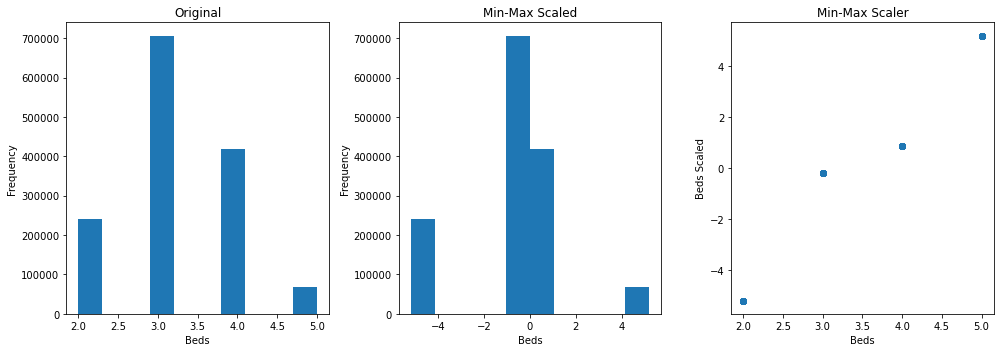

In [49]:
# Visualize the un-scaled and scaled distribution
plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bedroomcnt.plot.hist(title='Original')
plt.xlabel('Beds')

#subplot 2
plt.subplot(132)
train.bedroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('Beds')

#subplot 3
plt.subplot(133)
plt.scatter(train.bedroomcnt, train.bedroomcnt_scaled)
plt.xlabel('Beds')
plt.ylabel('Beds Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

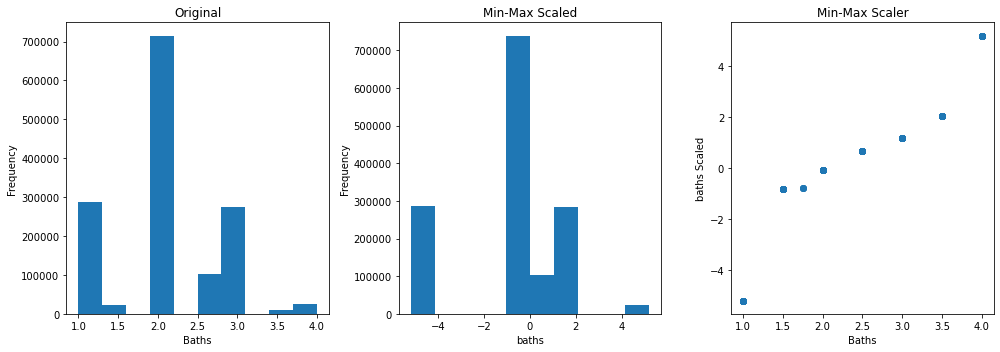

In [50]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bathroomcnt.plot.hist(title='Original')
plt.xlabel('Baths')

#subplot 2
plt.subplot(132)
train.bathroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('baths')

#subplot 3
plt.subplot(133)
plt.scatter(train.bathroomcnt, train.bathroomcnt_scaled)
plt.xlabel('Baths')
plt.ylabel('baths Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

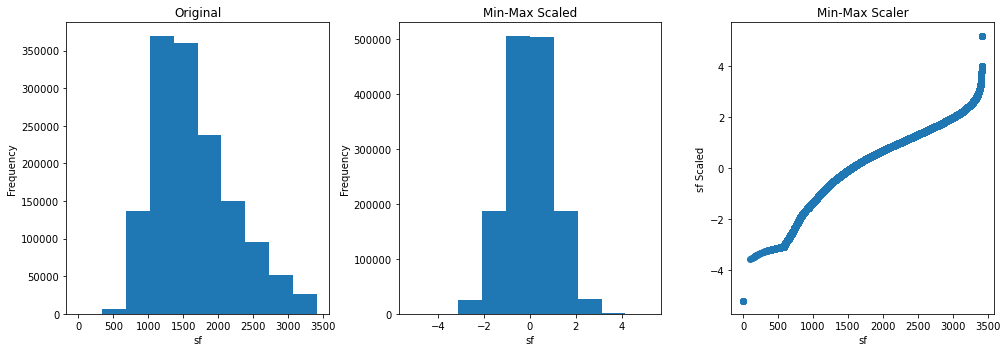

In [51]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.calculatedfinishedsquarefeet.plot.hist(title='Original')
plt.xlabel('sf')

#subplot 2
plt.subplot(132)
train.calculatedfinishedsquarefeet_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('sf')

#subplot 3
plt.subplot(133)
plt.scatter(train.calculatedfinishedsquarefeet, train.calculatedfinishedsquarefeet_scaled)
plt.xlabel('sf')
plt.ylabel('sf Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

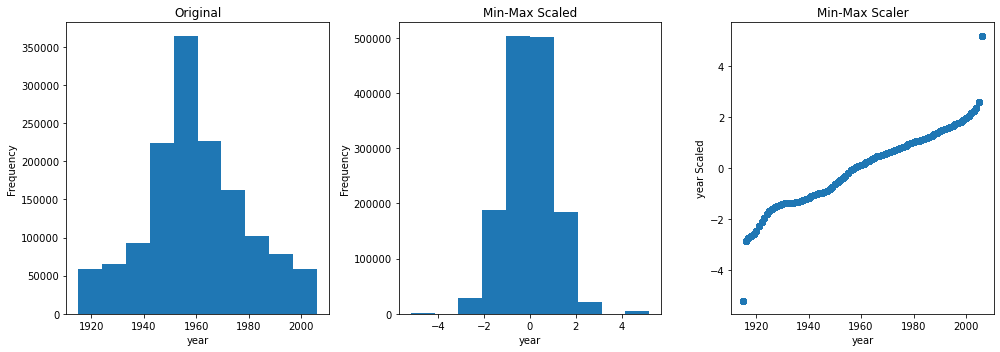

In [52]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.yearbuilt.plot.hist(title='Original')
plt.xlabel('year')

#subplot 2
plt.subplot(132)
train.yearbuilt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('year')

#subplot 3
plt.subplot(133)
plt.scatter(train.yearbuilt, train.yearbuilt_scaled)
plt.xlabel('year')
plt.ylabel('year Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

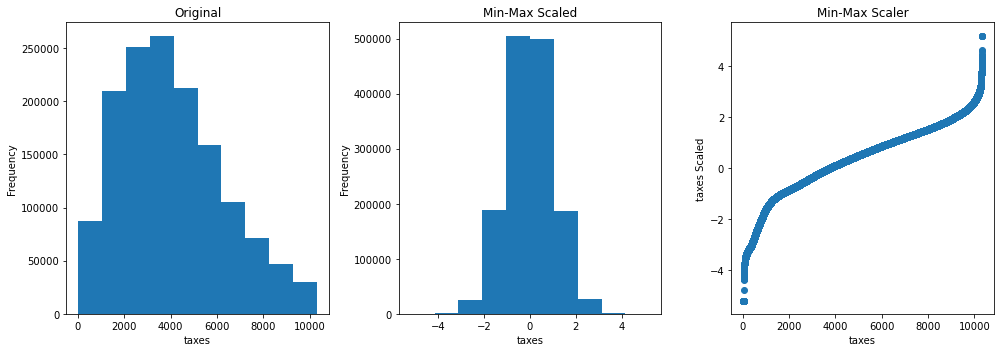

In [53]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.taxamount.plot.hist(title='Original')
plt.xlabel('taxes')

#subplot 2
plt.subplot(132)
train.taxamount_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('taxes')

#subplot 3
plt.subplot(133)
plt.scatter(train.taxamount, train.taxamount_scaled)
plt.xlabel('taxes')
plt.ylabel('taxes Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

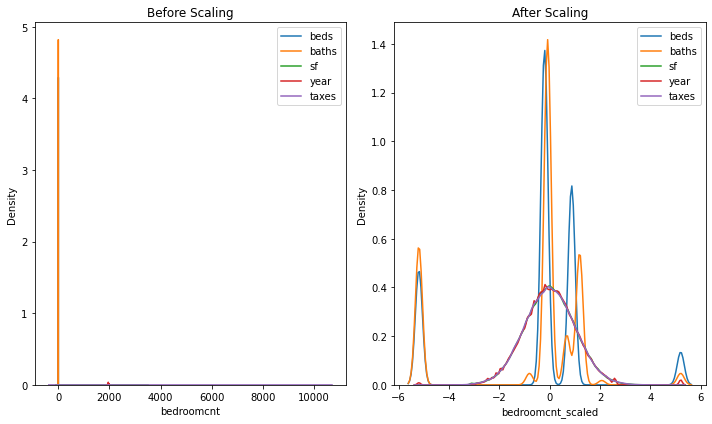

In [54]:
# Distributions

plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.bedroomcnt, label = 'beds')
sns.kdeplot(x = train.bathroomcnt,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet,label = 'sf')
sns.kdeplot(x = train.yearbuilt,label = 'year')
sns.kdeplot(x = train.taxamount,label = 'taxes')
# plt.xlabel('Original')
plt.legend()
plt.title('Before Scaling')

plt.subplot(122)
sns.kdeplot(x = train.bedroomcnt_scaled, label = 'beds')
sns.kdeplot(x = train.bathroomcnt_scaled,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet_scaled,label = 'sf')
sns.kdeplot(x = train.yearbuilt_scaled,label = 'year')
sns.kdeplot(x = train.taxamount_scaled,label = 'taxes')
# plt.xlabel('Scaled')
plt.title('After Scaling')
plt.legend()

plt.tight_layout()

## 4.

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

### QuantileTransformer

In [55]:
# use function from last exercises to wrangle data
train, validate, test = w.wrangle_zillow()

#### Apply Scaler

In [56]:
# use Ravinder's function to add scaled columns to each split
train, validate, test = add_scaled_columns(train, validate, test, scaler=sklearn.preprocessing.QuantileTransformer(), columns_to_scale=cols)

In [57]:
# take a look at results
train.head().T

,1029630,1168014,488819,243088,1508871
bedroomcnt,2,4,3,4,3
bathroomcnt,2.0,2.0,2.0,2.0,4.0
calculatedfinishedsquarefeet,2061,1902,2086,2096,2876
taxvaluedollarcnt,312381.0,420728.0,143683.0,731905.0,780947.0
yearbuilt,1956,1971,1955,1959,1959
taxamount,4080.3,4843.26,2194.57,8656.04,9569.81
fips,06037,06037,06037,06037,06037
bedroomcnt_scaled,0.0,0.806306,0.413914,0.806306,0.413914
bathroomcnt_scaled,0.466466,0.466466,0.466466,0.466466,1.0
calculatedfinishedsquarefeet_scaled,0.78003,0.713714,0.788789,0.792292,0.965108


#### Visualize Results

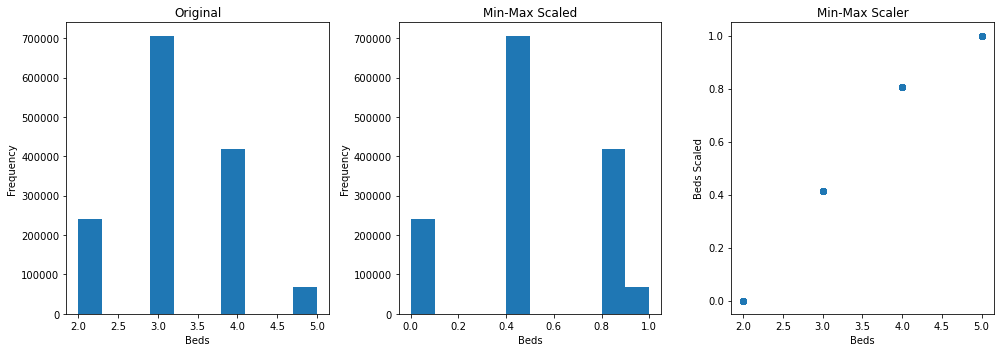

In [58]:
# Visualize the un-scaled and scaled distribution
plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bedroomcnt.plot.hist(title='Original')
plt.xlabel('Beds')

#subplot 2
plt.subplot(132)
train.bedroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('Beds')

#subplot 3
plt.subplot(133)
plt.scatter(train.bedroomcnt, train.bedroomcnt_scaled)
plt.xlabel('Beds')
plt.ylabel('Beds Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

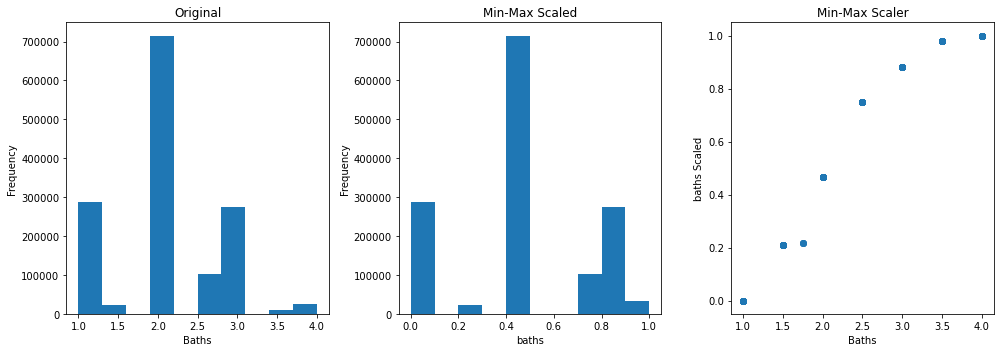

In [59]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.bathroomcnt.plot.hist(title='Original')
plt.xlabel('Baths')

#subplot 2
plt.subplot(132)
train.bathroomcnt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('baths')

#subplot 3
plt.subplot(133)
plt.scatter(train.bathroomcnt, train.bathroomcnt_scaled)
plt.xlabel('Baths')
plt.ylabel('baths Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

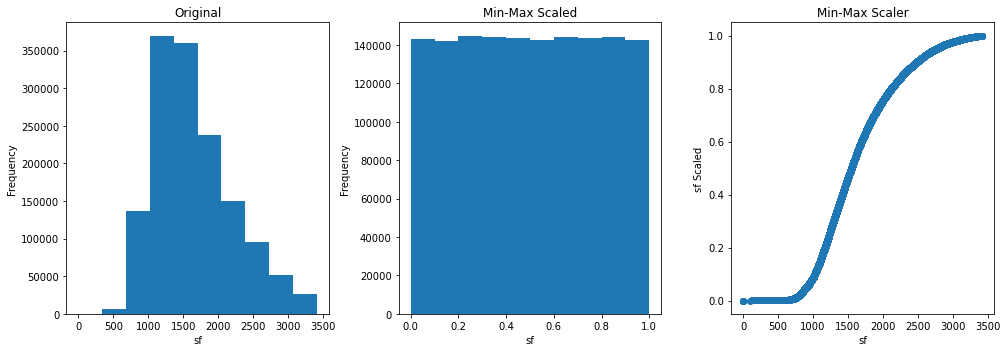

In [60]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.calculatedfinishedsquarefeet.plot.hist(title='Original')
plt.xlabel('sf')

#subplot 2
plt.subplot(132)
train.calculatedfinishedsquarefeet_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('sf')

#subplot 3
plt.subplot(133)
plt.scatter(train.calculatedfinishedsquarefeet, train.calculatedfinishedsquarefeet_scaled)
plt.xlabel('sf')
plt.ylabel('sf Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

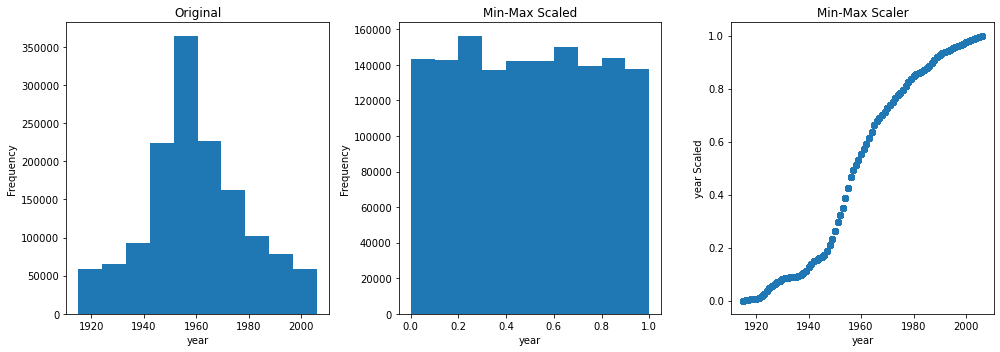

In [61]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.yearbuilt.plot.hist(title='Original')
plt.xlabel('year')

#subplot 2
plt.subplot(132)
train.yearbuilt_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('year')

#subplot 3
plt.subplot(133)
plt.scatter(train.yearbuilt, train.yearbuilt_scaled)
plt.xlabel('year')
plt.ylabel('year Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

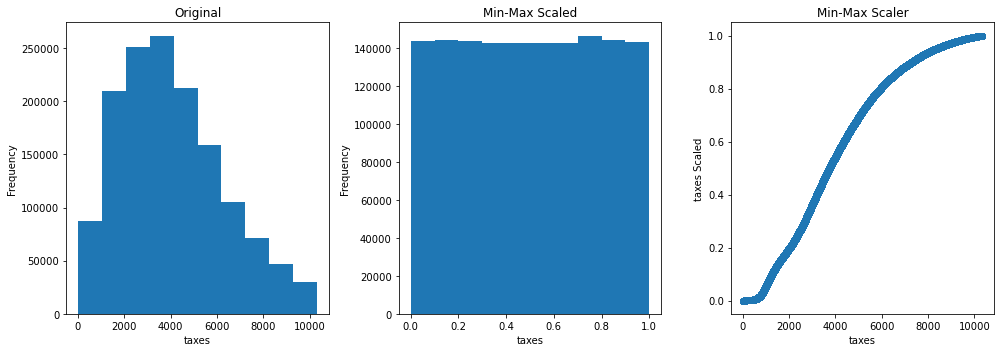

In [62]:
# Visualize the un-scaled and scaled distribution 

plt.figure(figsize=(14, 5))

# subplot 1
plt.subplot(131)
train.taxamount.plot.hist(title='Original')
plt.xlabel('taxes')

#subplot 2
plt.subplot(132)
train.taxamount_scaled.plot.hist(title='Min-Max Scaled')
plt.xlabel('taxes')

#subplot 3
plt.subplot(133)
plt.scatter(train.taxamount, train.taxamount_scaled)
plt.xlabel('taxes')
plt.ylabel('taxes Scaled')
plt.title('Min-Max Scaler')

plt.tight_layout()

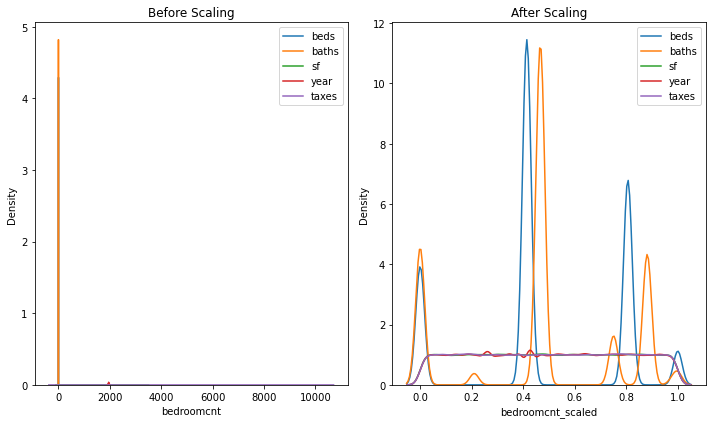

In [63]:
# Distributions

plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.bedroomcnt, label = 'beds')
sns.kdeplot(x = train.bathroomcnt,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet,label = 'sf')
sns.kdeplot(x = train.yearbuilt,label = 'year')
sns.kdeplot(x = train.taxamount,label = 'taxes')
# plt.xlabel('Original')
plt.legend()
plt.title('Before Scaling')

plt.subplot(122)
sns.kdeplot(x = train.bedroomcnt_scaled, label = 'beds')
sns.kdeplot(x = train.bathroomcnt_scaled,label = 'baths')
sns.kdeplot(x = train.calculatedfinishedsquarefeet_scaled,label = 'sf')
sns.kdeplot(x = train.yearbuilt_scaled,label = 'year')
sns.kdeplot(x = train.taxamount_scaled,label = 'taxes')
# plt.xlabel('Scaled')
plt.title('After Scaling')
plt.legend()

plt.tight_layout()

***Made distributions flat***

## 5.

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [64]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

***This function has been added to my wrangle.py module since I don't have a prepare.py (my wrangle.py is aquire and prepare steps combined)***